In [1]:
import torch
import numpy as np 
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image
from torch.distributions.normal import Normal
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import umap

from VAE import * 
import os

In [2]:
latent_vectors = torch.load("vae64latents.pt")

In [7]:
latent_vectors_np = latent_vectors.numpy()

In [6]:
labels_df = pd.read_csv("vae64labels.csv")
genre_labels = labels_df['label'].values


In [15]:
art_groups = {
    'Abstract_Expressionism':'Abstract Expressionism', 
    'Action_painting':'Abstract Expressionism', 
    'Analytical_Cubism':'Cubism', 
    'Art_Nouveau_Modern':'Art Nouveau', 
    'Baroque':'Baroque/Rococo', 
    'Color_Field_Painting':'Abstract Expressionism', 
    'Contemporary_Realism':'Realism', 
    'Cubism':'Cubism', 
    'Early_Renaissance':'Renaissance', 
    'Expressionism':'Expressionism', 
    'Fauvism':'Fauvism', 
    'High_Renaissance':'Renaissance', 
    'Impressionism':'Impressionism', 
    'Mannerism_Late_Renaissance':'Renaissance', 
    'Minimalism':'Minimalism', 
    'Naive_Art_Primitivism':'Naive Art', 
    'New_Realism':'Realism', 
    'Northern_Renaissance':'Renaissance', 
    'Pointillism':'Impressionism', 
    'Pop_Art':'Pop Art', 
    'Post_Impressionism':'Impressionism', 
    'Realism':'Realism',
    'Rococo':'Baroque/Rococo',
    'Romanticism':'Romanticism', 
    'Symbolism':'Symbolism',
    'Synthetic_Cubism':'Cubism',
    'Ukiyo_e':'Ukiyo-e'
}

In [16]:
# Grouped Labels
genre_labels_grouped = [art_groups[x] for x in genre_labels]
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(genre_labels_grouped)
unique_genres = label_encoder.classes_ 
unique_genres

array(['Abstract Expressionism', 'Art Nouveau', 'Baroque/Rococo',
       'Cubism', 'Expressionism', 'Fauvism', 'Impressionism',
       'Minimalism', 'Naive Art', 'Pop Art', 'Realism', 'Renaissance',
       'Romanticism', 'Symbolism', 'Ukiyo-e'], dtype='<U22')

In [ ]:
# Individual Labels
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(genre_labels)
unique_genres = label_encoder.classes_ 
unique_genres

In [5]:
len(art_groups)

27

In [23]:
reducer = umap.UMAP(n_neighbors=10, min_dist=1, n_components=2, metric='euclidean', random_state=42 )
embedding = reducer.fit_transform(latent_vectors_np)

/common/home/rzs9/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/common/home/rzs9/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [18]:
embedding.shape

(40047, 2)

In [26]:
from matplotlib.colors import ListedColormap
hex_colors = [
    "#E6194B",  # Red
    "#3CB44B",  # Green
    "#4363D8",  # Blue
    "#F58231",  # Orange
    "#911EB4",  # Purple
    "#42D4F4",  # Cyan
    "#F032E6",  # Magenta
    "#BFEF45",  # Lime
    "#FABED4",  # Pink
    "#469990",  # Turquoise
    "#FFE119",  # Yellow
    "#9A6324",  # Brown
    "#000075",  # Navy Blue
    "#A9A9A9",  # Grey
    "#000000"   # Black
]
custom_cmap = ListedColormap(hex_colors)

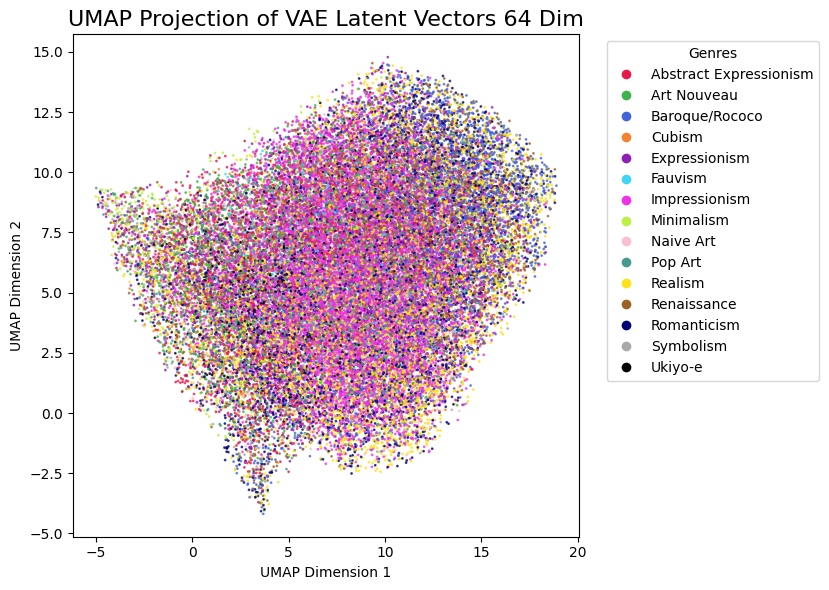

In [33]:
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('Spectral', 15)
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=numerical_labels, cmap=custom_cmap, s=1, alpha=0.7)
plt.title('UMAP Projection of VAE Latent Vectors 64 Dim', fontsize=16)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

legend_handles = []
for i, genre in enumerate(unique_genres):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', # Dummy point
                                     label=genre, markersize=8,
                                     markerfacecolor=custom_cmap(i / (15 - 1)) # Get color from cmap
                                     ))

# Add the legend to the plot
# Adjust bbox_to_anchor and loc to position the legend appropriately
plt.legend(handles=legend_handles, title='Genres', bbox_to_anchor=(1.04, 1), loc='upper left')

# Adjust layout to prevent legend overlap
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [34]:
plt.savefig("UMAP_plot_4.png")

<Figure size 640x480 with 0 Axes>